In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from pandas.plotting._core import plot_frame


In [3]:
crime_data = pd.read_csv("http://cluster.earlham.edu/~apc0013/Chicago_crime.csv")
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [87]:
def draw_map():
    chicago_map = geopandas.GeoDataFrame.from_file('map/chicago.shp')
    plt.rcParams["figure.figsize"]=(20,20)
    chicago_map.plot(cmap='autumn')
    plt.title("Crime Map of Chicago")
    plt.xlabel("Logitude")
    plt.ylabel("Latitude")

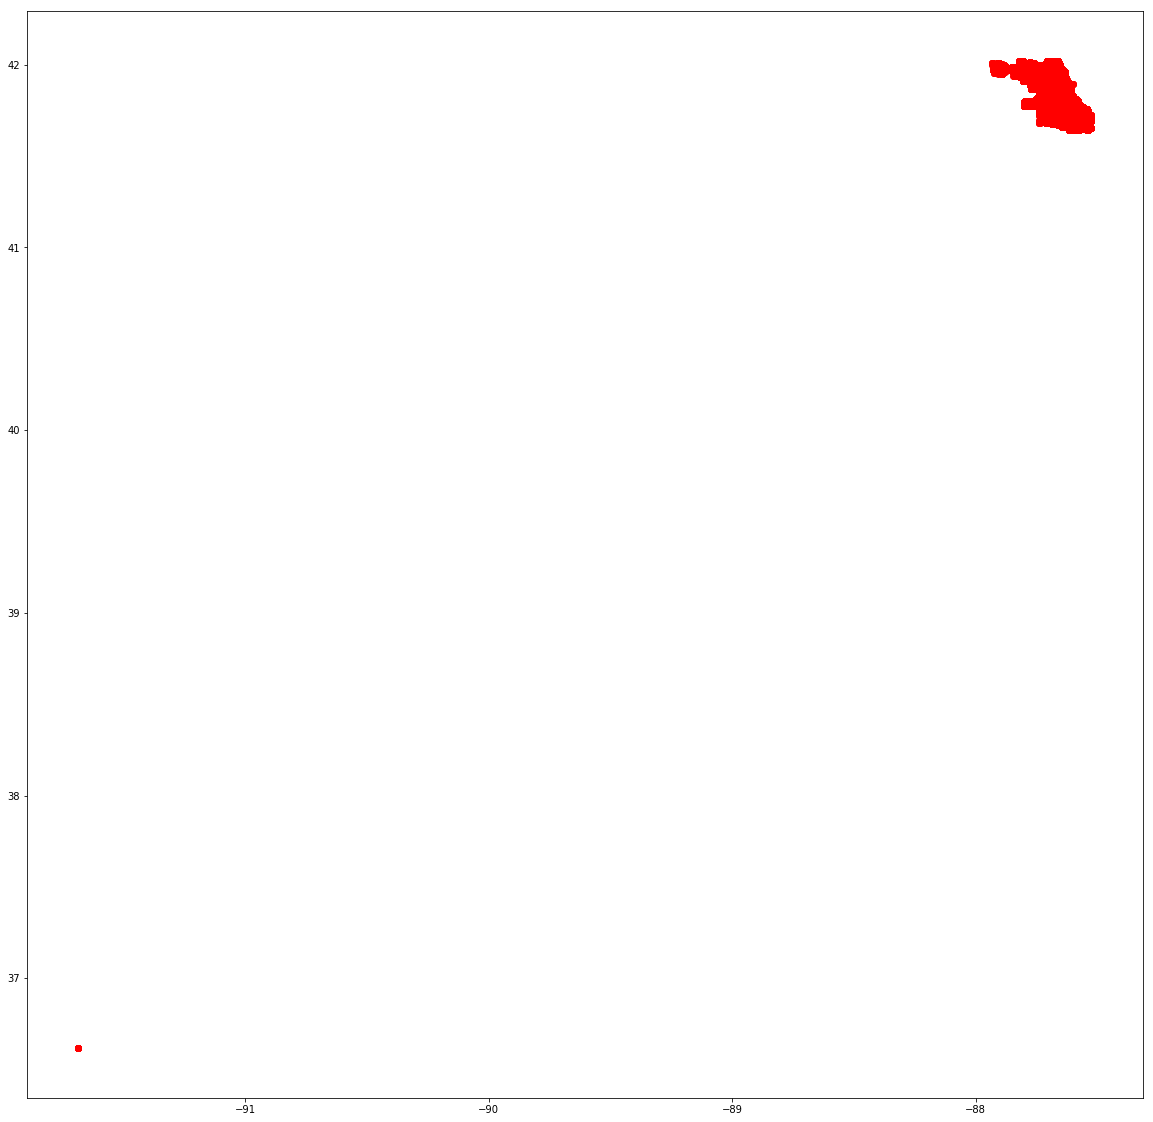

In [22]:
# There is an outlier in the dataset
plt.scatter(x=crime_data["Longitude"], y=crime_data["Latitude"], color="r")

In [5]:
# Get rid of the outlier
crime_data = crime_data[crime_data["Longitude"] != crime_data["Longitude"].min()]
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [43]:
# Getting districts for having the location markers
districts = crime_data[["Longitude", "Latitude", "District"]].groupby("District").mean()
districts.index = districts.index.astype(int)
districts.head()

,Longitude,Latitude
District,,
1,-87.628801,41.872211
2,-87.612855,41.810561
3,-87.596759,41.771357
4,-87.563609,41.734127
5,-87.622662,41.687579


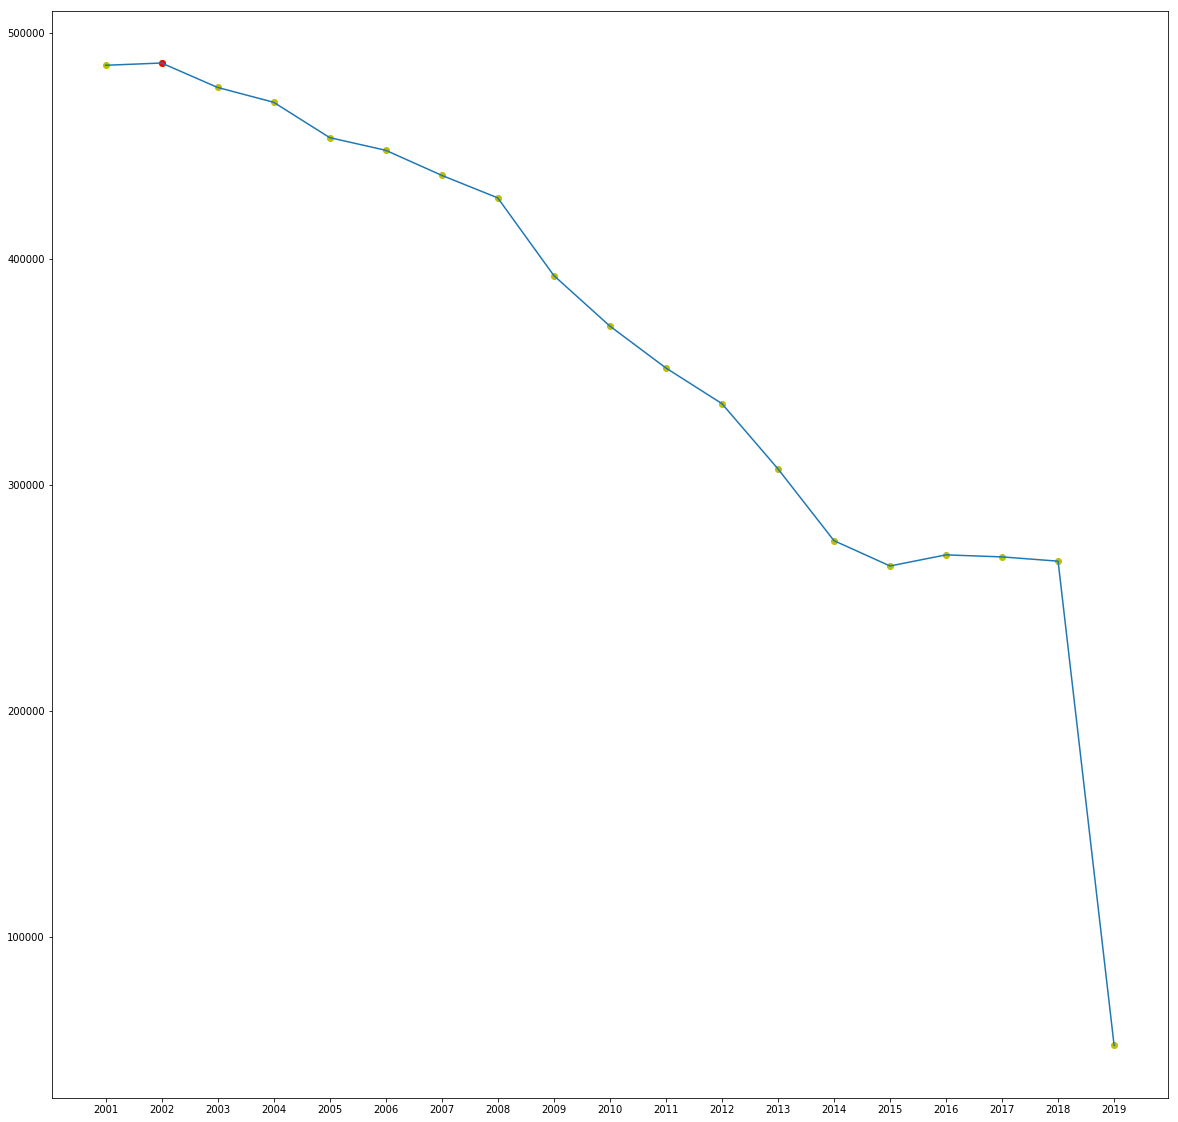

In [30]:
# crime_data[["Year", "ID"]].groupby("Year").count().max()
x = crime_data[["Year", "ID"]].groupby("Year").count().index
y = crime_data[["Year", "ID"]].groupby("Year").count()["ID"]

plt.plot(x, y)
plt.rcParams["figure.figsize"]=(20,20)
plt.scatter(x=x, y=y, color="y")
plt.scatter(x=2002, y=crime_data[["Year", "ID"]].groupby("Year").count().max(), color="r")
plt.xticks(x)
plt.show()

In [58]:
crimes_by_region = crime_data[["Year", "District", "ID"]][crime_data["Year"]==2002].groupby("District").count()
crimes_by_region.index = crimes_by_region.index.astype(int)
crimes_by_region = pd.concat([crimes_by_region[['ID']], districts], sort=True, axis=1).fillna(0)
crimes_by_region

,ID,Longitude,Latitude
District,,,
1,17971.0,-87.628801,41.872211
2,27044.0,-87.612855,41.810561
3,23557.0,-87.596759,41.771357
4,25829.0,-87.563609,41.734127
5,21091.0,-87.622662,41.687579
6,25314.0,-87.632525,41.745599
7,28123.0,-87.653740,41.775853
8,32091.0,-87.715388,41.778556
9,25312.0,-87.664999,41.815215


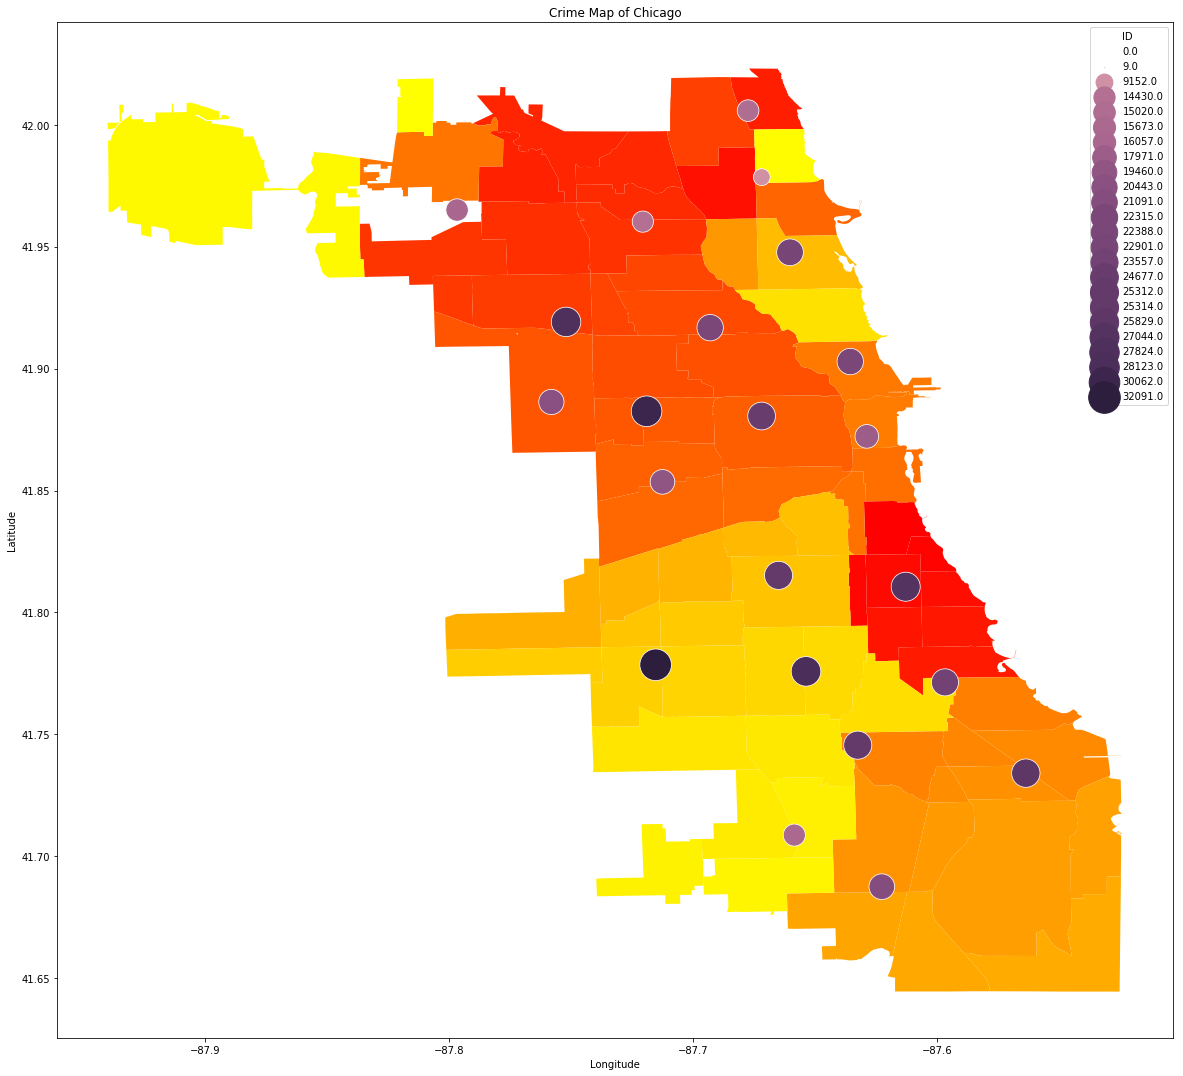

In [88]:
draw_map()
sns.scatterplot(x="Longitude", y="Latitude", size="ID", hue="ID", sizes=(0, 1000), data=crimes_by_region, legend="full", color='black')
